In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn
import numpy as np

sklearn.set_config(display="diagram")

X_train = pd.read_csv("../titanic_dataset/train.csv")
X_test = pd.read_csv("../titanic_dataset/test.csv")

In [3]:
y_train = X_train['Survived']
X_train.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin", "Survived"], inplace=True)

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import SGDClassifier

num_pipeline = make_pipeline(
    (SimpleImputer(missing_values=np.nan, strategy="median")),
    (StandardScaler()) 
)

cat_pipeline = make_pipeline(
    (OrdinalEncoder()),
    (SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    (OneHotEncoder(sparse_output=False))
)

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

sgd_clf = make_pipeline(preprocessing, SGDClassifier())
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13ffb91f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13ffb9100>)])),
                ('sgdclassifier', SGDClassifier())])

In [5]:
def some_passenger(idx):
    return pd.DataFrame(X_train.iloc[idx:idx+1,:], columns=X_train.columns)

def predict_some_passenger(idx, clf):
    prediction = clf.predict(some_passenger(idx))
    return prediction, y_train.iloc[idx]

In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

cv_score_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
cm_clf = confusion_matrix(y_train, y_train_pred)
cm_clf

array([[459,  90],
       [103, 239]])

In [7]:
from sklearn.ensemble import RandomForestClassifier 

forest_clf = make_pipeline(preprocessing, RandomForestClassifier())
forest_clf.fit(X_train, y_train)

cv_score_forest = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
cv_score_forest

y_train_probas = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
y_train_probas

array([[0.9 , 0.1 ],
       [0.04, 0.96],
       [0.69, 0.31],
       ...,
       [0.47, 0.53],
       [0.76, 0.24],
       [0.4 , 0.6 ]])

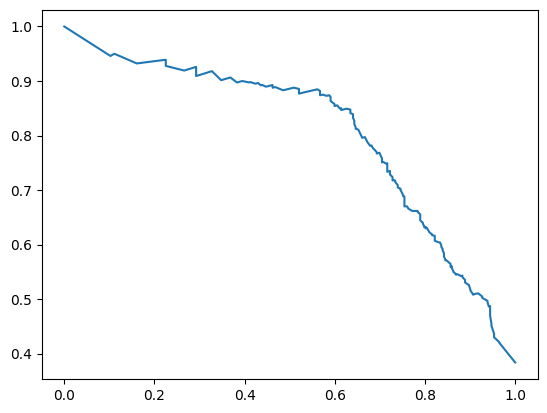

In [8]:
from sklearn.metrics import precision_recall_curve

y_scores_forest = y_train_probas[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_forest)

plt.plot(recalls, precisions)
plt.show()

In [9]:
forest_clf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [12]:
from sklearn.svm import SVC

svc_clf = make_pipeline(preprocessing, SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=10)
svc_scores.mean()


0.8260549313358302